In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [123]:
import pandas as pd

In [125]:
  #             Meaning of attacks that would be showed in the graph -:
#DOS: denial-of-service, e.g. syn flood;
#R2L: unauthorized access from a remote machine, e.g. guessing password;
#U2R: unauthorized access to local superuser (root) privileges
#probing: surveillance and another probing, e.g., port scanning.

In [126]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [127]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


Using Pandas to read dataset -:

In [128]:
AttackData=pd.read_csv("AttackData.gz",names=columns)
AttackData['Attack Type'] = AttackData.target.apply(lambda r:attacks_types[r[:-1]])
AttackData.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [129]:
AttackData.shape

(494021, 43)

In [130]:
AttackData['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [131]:
AttackData['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [132]:
AttackData.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Proccessing our attack dataset -:

In [133]:
AttackData.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [134]:
#Here,we are going to find the categorical features of the attack dataset
number_cols = AttackData._get_numeric_data().columns
cols = list(set(AttackData.columns)-set(number_cols))
cols.remove('target')
cols.remove('Attack Type')
cols

['flag', 'protocol_type', 'service']

Disturbution of categorical dataset -:

In [135]:
# Function to visualise the data uisbg bar graph from matplotlib -:
def pie_graph(feature):
    AttackData[feature].value_counts().plot(kind="pie")

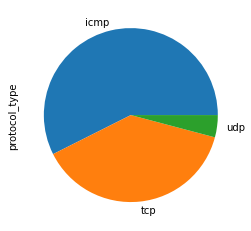

In [136]:
pie_graph('protocol_type')

AS WE CAN NOTICE HERE THAT ICMP (INTERNET CONTROL MESSAGE PROTOCOL) IS THE MOST USED FOLLWOED BY THE TCP AND UDP.

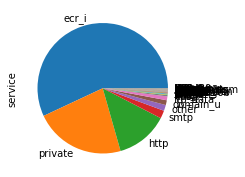

In [137]:
plt.figure(figsize=(15,3))
pie_graph('service')

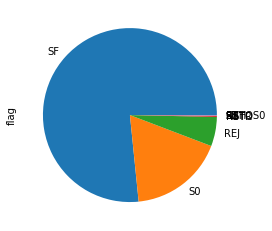

In [138]:
#Flag is from dataset which means if there's any network connectivity issue.
pie_graph('flag')

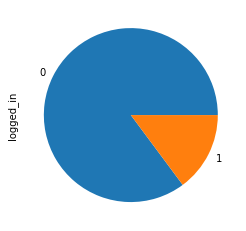

In [139]:
#Logged_in is from dataset which means that the person is logged in or not (it's a boolen values)
pie_graph('logged_in')

We can see from the graph that 7000 packets are logged in as 1 stands for logged in and 0 stands for not logged in.

Graph to show target feature distribution -:

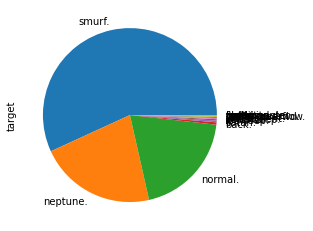

In [140]:
pie_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

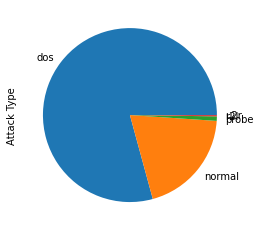

In [141]:
pie_graph('Attack Type')

In [142]:
AttackData.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION -:
We are going to find the highly correlated variables using heatmap and ignore them for analysis.

C:\Users\ajink\AppData\Local\Temp\ipykernel_164\1457212534.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  AttackData = AttackData.dropna('columns')# drop columns with NaN


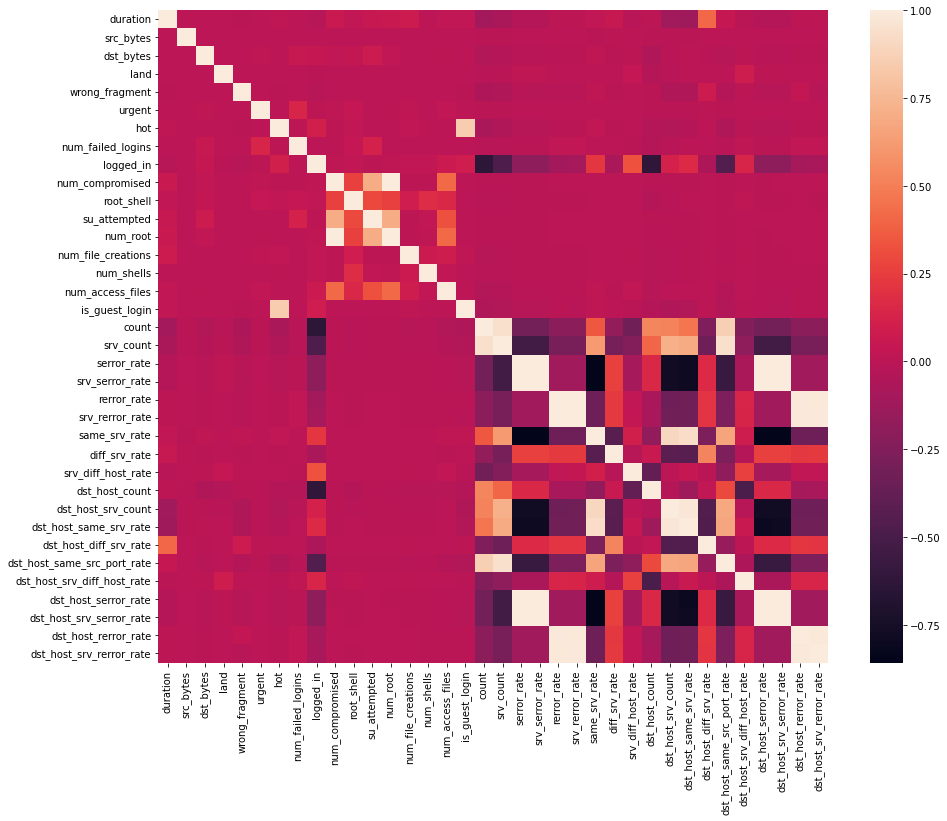

In [143]:
AttackData = AttackData.dropna('columns')# drop columns with NaN

AttackData = AttackData[[col for col in AttackData if AttackData[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = AttackData.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [144]:
AttackData['num_root'].corr(AttackData['num_compromised'])

0.9938277978738366

In [145]:
AttackData['srv_serror_rate'].corr(AttackData['serror_rate'])

0.9983615072725952

In [146]:
AttackData['srv_count'].corr(AttackData['count'])

0.9436670688882655

In [147]:
AttackData['srv_rerror_rate'].corr(AttackData['rerror_rate'])

0.9947309539817937

In [148]:
AttackData['dst_host_same_srv_rate'].corr(AttackData['dst_host_srv_count'])

0.9736854572953983

In [149]:
AttackData['dst_host_srv_serror_rate'].corr(AttackData['dst_host_serror_rate'])

0.9981559173373309

In [150]:
AttackData['dst_host_srv_rerror_rate'].corr(AttackData['dst_host_rerror_rate'])

0.9848038371110298

In [151]:
AttackData['dst_host_same_srv_rate'].corr(AttackData['same_srv_rate'])

0.9278080342691242

In [152]:
AttackData['dst_host_srv_count'].corr(AttackData['same_srv_rate'])

0.8989546630324209

In [153]:
AttackData['dst_host_same_src_port_rate'].corr(AttackData['srv_count'])

0.9449263676783333

In [154]:
AttackData['dst_host_serror_rate'].corr(AttackData['serror_rate'])

0.9986729680105015

In [155]:
AttackData['dst_host_serror_rate'].corr(AttackData['srv_serror_rate'])

0.997835300373975

In [156]:
AttackData['dst_host_srv_serror_rate'].corr(AttackData['serror_rate'])

0.9978492485680104

In [157]:
AttackData['dst_host_srv_serror_rate'].corr(AttackData['srv_serror_rate'])

0.9993041091850098

In [158]:
AttackData['dst_host_rerror_rate'].corr(AttackData['rerror_rate'])

0.9869947924956001

In [159]:
AttackData['dst_host_rerror_rate'].corr(AttackData['srv_rerror_rate'])

0.9821663427308375

In [160]:
AttackData['dst_host_srv_rerror_rate'].corr(AttackData['rerror_rate'])

0.9851995540751249

In [161]:
AttackData['dst_host_srv_rerror_rate'].corr(AttackData['srv_rerror_rate'])

0.9865705438845669

In [162]:
AttackData.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [163]:
AttackData.shape

(494021, 41)

In [164]:
AttackData.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [165]:
df_std = AttackData.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\ajink\AppData\Local\Temp\ipykernel_164\2249781693.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = AttackData.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
dst_host_srv_rerror_rate            0.230140
dst_host_rerror_rate                0.230590
rerror_rate                         0.231623
srv_rerror_rate                     0.232147
logged_in                           0.355345
dst_host_serror_rate                0.380593
serror_rate                         0.380717
dst_host_srv_serror_rate            0.380919
srv_serror

FEATURE MAPPING

In [166]:
AttackData['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [167]:
df = pd.DataFrame(AttackData)

In [168]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
AttackData['protocol_type'] = df['protocol_type'].map(pmap)

In [169]:
AttackData['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [170]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
AttackData['flag'] = AttackData['flag'].map(fmap)

In [171]:
AttackData.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [172]:
AttackData.drop('service',axis = 1,inplace= True)

In [173]:
AttackData.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [174]:
AttackData.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

MODELLING & MACHINE LEARNING

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [176]:
AttackData = AttackData.drop(['target',], axis=1)
print(AttackData.shape)

# Target variable and train set
Y = AttackData[['Attack Type']]
X = AttackData.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 39)
(330994, 38) (163027, 38)
(330994, 1) (163027, 1)


USING GAUSSIAN NAIVE BAYES

In [177]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [178]:
model1 = GaussianNB()

In [179]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [180]:
print("Training time: ",end_time-start_time)

Training time:  0.4837031364440918


In [181]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [182]:
print("Testing time: ",end_time-start_time)

Testing time:  0.25933194160461426


In [183]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8793573297401162
Test score is: 0.8791672545038552


DECISION TREE

In [184]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [185]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [186]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [187]:
print("Training time: ",end_time-start_time)

Training time:  1.1608989238739014


In [188]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [189]:
print("Testing time: ",end_time-start_time)

Testing time:  0.02393651008605957


In [190]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905255080152511
Test score is: 0.990437166849663


RANDOM FOREST

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
model3 = RandomForestClassifier(n_estimators=30)

In [193]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [194]:
print("Training time: ",end_time-start_time)

Training time:  8.585035800933838


In [195]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [196]:
print("Testing time: ",end_time-start_time)

Testing time:  0.3779911994934082


In [197]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999667667691862
Test score is: 0.9996810344298798


SUPPORT VECTOR MACHINE

In [198]:
from sklearn.svm import SVC

In [199]:
model4 = SVC(gamma = 'scale')

In [200]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [201]:
print("Training time: ",end_time-start_time)

Training time:  184.7582471370697


In [202]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [203]:
print("Testing time: ",end_time-start_time)

Testing time:  69.89801049232483


In [204]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.998939557816758
Test score is: 0.9988958884111221


LOGISTIC REGRESSION

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
model5 = LogisticRegression(max_iter=1200000)

In [207]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [208]:
print("Training time: ",end_time-start_time)

Training time:  32.90535545349121


In [209]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [210]:
print("Testing time: ",end_time-start_time)

Testing time:  0.021459102630615234


In [211]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9948307220070455
Test score is: 0.9949456225042478


GRADIENT BOOSTING CLASSIFIER

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
model6 = GradientBoostingClassifier(random_state=0)

In [214]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [215]:
print("Training time: ",end_time-start_time)

Training time:  385.5268602371216


In [216]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [217]:
print("Testing time: ",end_time-start_time)

Testing time:  1.222174882888794


In [218]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9855072901623594
Test score is: 0.9854502628398977


TRAINING ACCURACY

<BarContainer object of 6 artists>

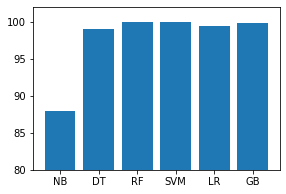

In [235]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.951,99.058,99.997,99.875,99.352,99.793]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [236]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 6 artists>

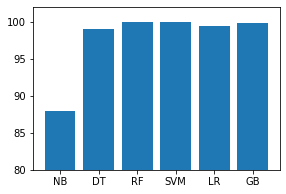

In [237]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.903,99.052,99.969,99.879,99.352,99.771]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [238]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 6 artists>

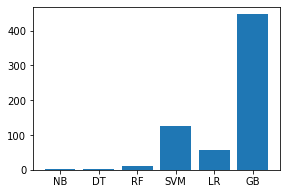

In [239]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [240]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 6 artists>

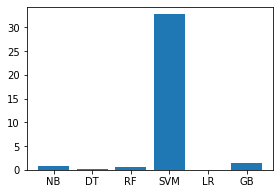

In [241]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('test_time_figure.png',bbox_inches='tight')